In [2]:
import numpy as np
from scipy.sparse.linalg import LinearOperator, eigsh
import pandas as pd
import seaborn as sns

from cvx.covariance.ewma import _ewma_cov
from experiments.utils.low_rank_ewma import _ewma_low_rank, low_rank_iterated_ewma
from experiments.utils.experiment_utils import log_likelihood_low_rank, log_likelihood_regularized
from cvx.covariance.regularization import *
from cvx.covariance.regularization import em_regularize_covariance

sns.set()
sns.set(font_scale=1.5)

%load_ext autoreload
%autoreload 2

In [3]:
np.random.seed(0)
A = np.random.randn(10, 10)

Sigma = {"time": pd.DataFrame(A @ A.T)}
Sigma_reg = dict(regularize_covariance(Sigma, 2, low_rank_format=True))
Sigma_em = dict(em_regularize_covariance(Sigma, Sigma_reg))

100%|██████████| 1/1 [00:00<00:00, 12.98it/s]


In [5]:
Sigma_em["time"].F

,0,1
0,-3.039701,0.575773
1,-0.623159,2.266922
2,0.330245,0.512377
3,1.787435,1.050644
4,0.516033,-2.306365
5,1.731422,0.513118
6,2.303091,-1.267585
7,0.166077,-0.261998
8,1.663068,1.966998
9,-0.176000,0.743121


In [39]:
pd.Series(np.array([ 5.36390008,  0.61685613, 19.68099245,  3.92494831,  9.52083963, 0.17725664,  1.30694537,  5.10017934,  7.55662054,  6.06427555]))

0     5.363900
1     0.616856
2    19.680992
3     3.924948
4     9.520840
5     0.177257
6     1.306945
7     5.100179
8     7.556621
9     6.064276
dtype: float64

In [38]:
Sigma_em["time"].d.values

array([ 5.36390008,  0.61685613, 19.68099245,  3.92494831,  9.52083963,
        0.17725664,  1.30694537,  5.10017934,  7.55662054,  6.06427555])

In [35]:
np.array([[-1.19547421, -1.95924884],
       [ 1.32912338, -0.66264544],
       [ 1.88882431, -1.63457006],
       [-2.06460972, -1.83187843],
       [ 0.42919508,  2.43756206],
       [-0.82949532,  0.03632282],
       [ 1.32227855,  0.25279867],
       [ 1.5155505 ,  0.07384519],
       [ 0.384604  ,  1.26130513],
       [-2.58246444,  2.32904519]])

array([[-1.19547421, -1.95924884],
       [ 1.32912338, -0.66264544],
       [ 1.88882431, -1.63457006],
       [-2.06460972, -1.83187843],
       [ 0.42919508,  2.43756206],
       [-0.82949532,  0.03632282],
       [ 1.32227855,  0.25279867],
       [ 1.5155505 ,  0.07384519],
       [ 0.384604  ,  1.26130513],
       [-2.58246444,  2.32904519]])

In [2]:
returns = 100*pd.read_csv("../data/returns_large_universe.csv", index_col=0, parse_dates=True)

returns = 100*pd.read_csv("../data/49_industries.csv", index_col=0, parse_dates=True)
returns = returns.iloc[:,:50]

In [3]:
from cvx.covariance.regularization import *


In [4]:
Sigma = {"time" : returns.cov()}
Sigma_reg = dict(regularize_covariance(Sigma, 5, True))

In [5]:
Sigma_val = [*Sigma.values()][0]
F1, d1 = Sigma_reg["time"].F.values, Sigma_reg["time"].d.values
state = _State(Sigma_val.values, F1, d1)

In [328]:
F, d = state.build()

In [6]:
state.objective()

38.33296645295691

In [7]:
state.construct_problem()

In [8]:
state.iterate()

38.33296645295691


In [15]:
F, d = state.build()

In [9]:
for _ in range(50):
    state.iterate()

37.842531231476215
37.75767402480042
37.72961360749636
37.71618877905324
37.70850190061974
37.70359513340496
37.70018909931838
37.69764277159591
37.69560062343042
37.69384875647535
37.69224895765983
37.690705472109514
37.689146658043356
37.687513636355874
37.68575300676349
37.68381078579746
37.681627045550826
37.679130277223834
37.67623067925838
37.6728098778608
37.66870892291874
37.66370892370806
37.657502747426236
37.64965979021488
37.63958158271883
37.626473325388076
37.60939635457008
37.58755948962482
37.561019937511375
37.53155524363375
37.50247797153882
37.47652177277102
37.45383094244714
37.43238452347367
37.40963226193618
37.383531131230654
37.35307161583847
37.31883489159334
37.28331837355766
37.250243311245555
37.22283885253877
37.202421286923
37.18841196170027
37.17930833818052
37.173570852189684
37.170006979460425
37.16780569121079
37.16644807886479
37.16561067038111
37.16509388146265


In [253]:
for _ in range(50):
    state.iterate()

-13531800051.208286
-1.7560320374771139e+18
-2.2813162208865532e+26
-2.9637625189814485e+34
-3.8503603188601e+42
-5.002180341884795e+50


LinAlgError: Singular matrix

In [60]:
state_ccv = _State(Sigma_val.values, F_ccv, d_ccv)
state_em = _State(Sigma_val.values, F_em.values, d_em.values)
state_svd = _State(Sigma_val.values, F1, d1)

In [12]:
state_em = _State(Sigma_val.values, F_em.values, d_em.values)


In [66]:
state_temp = _State(F_em.values@F_em.values.T + np.diag(d_em.values), F_ccv, d_ccv)
state_temp.objective()

37.779684364470086

In [68]:
state_ccv.objective()

37.681430524842895

In [62]:
state_em.objective()

37.68762993231638

In [63]:
state_svd.objective()

38.33296645295691

In [69]:
state.objective()

38.33296645295691

In [227]:
state.construct_problem()

In [228]:
state.iterate()

38.33296645295691


In [229]:
for _ in range(10):
    state.iterate()

37.842549488716045
37.757651543442535
37.729597212217854
37.716178522250814
37.70849857593933
37.703597068452055
37.70018734711316
37.69763938285587
37.69558570804956
37.693817567085304


In [51]:
for _ in range(10):
    state.iterate()

37.70018734711316
37.69763938285587
37.69558570804956
37.693817567085304
37.69221047445792
37.6906392365334
37.68907208840493
37.68740113073635
37.685620911617846
37.683648017398795


In [57]:
F_ccv, d_ccv = state.build()

In [ ]:
F@F.T + np.diag(d)

In [53]:
pd.DataFrame(F@F.T + np.diag(d))

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,2.128130,0.596342,0.691711,0.611170,0.633554,0.916818,1.038953,0.861662,0.703223,0.905737,...,0.896225,0.953356,0.839896,0.796042,0.829700,1.035559,0.875296,0.984939,1.061606,0.877295
1,0.596342,0.885274,0.747038,0.720611,0.708400,0.778734,0.824037,0.694398,0.756236,0.736445,...,0.741728,0.760231,0.698051,0.740562,0.763778,0.824321,0.759440,0.703343,0.797773,0.731539
2,0.691711,0.747038,2.022730,0.830022,0.813827,0.926020,0.983337,0.814556,0.879078,0.866942,...,0.865619,0.892889,0.817435,0.875047,0.896656,0.962504,0.882156,0.819365,0.948947,0.859939
3,0.611170,0.720611,0.830022,1.358231,0.791493,0.820855,0.853381,0.716683,0.841767,0.761167,...,0.776539,0.785613,0.728737,0.798272,0.817974,0.843844,0.796680,0.689499,0.812393,0.766271
4,0.633554,0.708400,0.813827,0.791493,2.001906,0.809467,0.850104,0.722153,0.823200,0.761005,...,0.789391,0.795648,0.733736,0.780767,0.804845,0.853485,0.798317,0.710334,0.821708,0.769050
5,0.916818,0.778734,0.926020,0.820855,0.809467,2.528396,1.522705,1.174284,0.959727,1.284745,...,1.128985,1.266737,1.131051,1.182872,1.199705,1.388207,1.172591,1.323539,1.476026,1.188213
6,1.038953,0.824037,0.983337,0.853381,0.850104,1.522705,2.946219,1.322677,1.022726,1.442807,...,1.267329,1.430756,1.262096,1.298947,1.318088,1.573560,1.304826,1.513249,1.682619,1.332743
7,0.861662,0.694398,0.814556,0.716683,0.722153,1.174284,1.322677,1.578914,0.837325,1.146001,...,1.037395,1.151768,1.011915,1.017483,1.046469,1.284418,1.069675,1.225014,1.324249,1.069602
8,0.703223,0.756236,0.879078,0.841767,0.823200,0.959727,1.022726,0.837325,1.233663,0.893201,...,0.886401,0.919095,0.837245,0.905004,0.921953,0.987957,0.900095,0.834726,0.987015,0.886366
9,0.905737,0.736445,0.866942,0.761167,0.761005,1.284745,1.442807,1.146001,0.893201,1.810593,...,1.098777,1.234443,1.087800,1.108367,1.136495,1.381810,1.149110,1.326708,1.431409,1.148572


In [56]:
pd.DataFrame(F_em@F_em.T + np.diag(d_em))

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Agric,2.134190,0.601742,0.697532,0.616246,0.640301,0.915356,1.042410,0.867838,0.706100,0.907687,...,0.901336,0.957114,0.845354,0.797986,0.831316,1.047803,0.884939,0.991088,1.073901,0.884462
Food,0.601742,0.893641,0.759094,0.734010,0.721604,0.778240,0.825456,0.699389,0.764507,0.738211,...,0.746023,0.762464,0.703077,0.745607,0.768346,0.834449,0.769701,0.705720,0.805836,0.738277
Soda,0.697532,0.759094,2.033341,0.844196,0.827771,0.926043,0.985981,0.820204,0.888120,0.868950,...,0.870516,0.895582,0.822959,0.881056,0.901779,0.973889,0.893274,0.821485,0.958996,0.867786
Beer,0.616246,0.734010,0.844196,1.370911,0.806783,0.820354,0.855332,0.722275,0.851172,0.762919,...,0.780282,0.787162,0.734219,0.804581,0.823431,0.855851,0.808862,0.691982,0.822210,0.773907
Smoke,0.640301,0.721604,0.827771,0.806783,2.012911,0.804772,0.849963,0.727625,0.831491,0.760359,...,0.793363,0.796340,0.738725,0.784802,0.807722,0.867540,0.811533,0.711956,0.833750,0.777175
Toys,0.915356,0.778240,0.926043,0.820354,0.804772,2.539535,1.548568,1.182633,0.967124,1.309500,...,1.136560,1.283020,1.142798,1.201628,1.221653,1.380135,1.169088,1.340978,1.470755,1.191473
Fun,1.042410,0.825456,0.985981,0.855332,0.849963,1.548568,2.959475,1.328831,1.032483,1.459449,...,1.279149,1.446293,1.270872,1.312357,1.333240,1.567414,1.301356,1.520151,1.679655,1.337670
Books,0.867838,0.699389,0.820204,0.722275,0.727625,1.182633,1.328831,1.586091,0.845371,1.153136,...,1.047110,1.161228,1.017343,1.023607,1.053159,1.286332,1.071798,1.227308,1.326348,1.075238
Hshld,0.706100,0.764507,0.888120,0.851172,0.831491,0.967124,1.032483,0.845371,1.244377,0.900594,...,0.888641,0.922825,0.844486,0.914208,0.930441,1.000936,0.911813,0.844431,0.999927,0.894374
Clths,0.907687,0.738211,0.868950,0.762919,0.760359,1.309500,1.459449,1.153136,0.900594,1.819509,...,1.107562,1.248397,1.096686,1.121353,1.151744,1.378850,1.148347,1.338596,1.429078,1.152938


In [11]:
F_em, d_em = Sigma_em["time"].F, Sigma_em["time"].d

In [10]:
Sigma_em = dict(em_regularize_covariance(Sigma, Sigma_reg))

100%|██████████| 1/1 [00:00<00:00,  2.52it/s]


In [10]:
Sigma_em["time"].F@Sigma_em["time"].F.T + np.diag(Sigma_em["time"].d)

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths
Agric,2.128484,0.602331,0.670537,0.632680,0.655999,0.901135,1.025004,0.841875,0.671326,0.891066
Food,0.602331,0.893021,0.761225,0.777235,0.746118,0.800004,0.861769,0.702306,0.732756,0.756053
Soda,0.670537,0.761225,2.021051,0.906705,0.823278,0.921462,0.987513,0.813283,0.890267,0.863929
Beer,0.632680,0.777235,0.906705,1.378102,0.776113,0.805889,0.849354,0.728156,0.882219,0.780100
Smoke,0.655999,0.746118,0.823278,0.776113,2.001668,0.831086,0.876926,0.722801,0.816623,0.756122
Toys,0.901135,0.800004,0.921462,0.805889,0.831086,2.560607,1.636209,1.240787,0.984583,1.357060
Fun,1.025004,0.861769,0.987513,0.849354,0.876926,1.636209,2.986913,1.375756,1.065935,1.505776
Books,0.841875,0.702306,0.813283,0.728156,0.722801,1.240787,1.375756,1.599078,0.856159,1.148313
Hshld,0.671326,0.732756,0.890267,0.882219,0.816623,0.984583,1.065935,0.856159,1.246024,0.925441
Clths,0.891066,0.756053,0.863929,0.780100,0.756122,1.357060,1.505776,1.148313,0.925441,1.836296


In [244]:
[*Sigma.values()][0]

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths
Agric,2.127303,0.600749,0.666230,0.631216,0.652548,0.899182,1.022851,0.840028,0.669502,0.889139
Food,0.600749,0.883909,0.761244,0.748366,0.746150,0.760114,0.810084,0.706086,0.752793,0.752411
Soda,0.666230,0.761244,2.021033,0.906682,0.826147,0.920898,0.986723,0.812621,0.890253,0.863209
Beer,0.631216,0.748366,0.906682,1.356579,0.777109,0.804753,0.864490,0.710177,0.849238,0.767399
Smoke,0.652548,0.746150,0.826147,0.777109,2.000328,0.830362,0.876076,0.722014,0.816601,0.755319
Toys,0.899182,0.760114,0.920898,0.804753,0.830362,2.527070,1.632523,1.156499,0.988611,1.340043
Fun,1.022851,0.810084,0.986723,0.864490,0.876076,1.632523,2.944816,1.361244,1.039509,1.436011
Books,0.840028,0.706086,0.812621,0.710177,0.722014,1.156499,1.361244,1.577218,0.831902,1.146951
Hshld,0.669502,0.752793,0.890253,0.849238,0.816601,0.988611,1.039509,0.831902,1.232078,0.889456
Clths,0.889139,0.752411,0.863209,0.767399,0.755319,1.340043,1.436011,1.146951,0.889456,1.808614


# Low rank iterated EWMA below here!

In [15]:
ewmas2 = list(low_rank_iterated_ewma(
    returns,
    vola_halflife=63,
    cov_halflife=250,
    rank=2,
    min_periods_vola=21,
    min_periods_cov=100,
))
print(1)
ewmas5 = list(low_rank_iterated_ewma(
    returns,
    vola_halflife=63,
    cov_halflife=250,
    rank=5,
    min_periods_vola=21,
    min_periods_cov=100,
))
print(2)
ewmas10 = list(low_rank_iterated_ewma(
    returns,
    vola_halflife=63,
    cov_halflife=250,
    rank=10,
    min_periods_vola=21,
    min_periods_cov=100,
))
print(3)
ewmas20 = list(low_rank_iterated_ewma(
    returns,
    vola_halflife=63,
    cov_halflife=250,
    rank=20,
    min_periods_vola=21,
    min_periods_cov=100,
))
print(4)
ewmas35 = list(low_rank_iterated_ewma(
    returns,
    vola_halflife=63,
    cov_halflife=250,
    rank=35,
    min_periods_vola=21,
    min_periods_cov=100,
))
print(5)
ewmas50 = list(low_rank_iterated_ewma(
    returns,
    vola_halflife=63,
    cov_halflife=250,
    rank=50,
    min_periods_vola=21,
    min_periods_cov=100,
))
print(6)
ewmas60 = list(low_rank_iterated_ewma(
    returns,
    vola_halflife=63,
    cov_halflife=250,
    rank=60,
    min_periods_vola=21,
    min_periods_cov=100,
))
print(7)
ewmas75 = list(low_rank_iterated_ewma(
    returns,
    vola_halflife=63,
    cov_halflife=250,
    rank=75,
    min_periods_vola=21,
    min_periods_cov=100,
))

1
2
3
4
5
6
7


In [16]:
Sigmas2 = {}
for iewma in ewmas2:
    Sigmas2[iewma.time] = iewma.covariance
ll2 = log_likelihood_low_rank(returns, Sigmas2)
print(1)
Sigmas5 = {}
for iewma in ewmas5:
    Sigmas5[iewma.time] = iewma.covariance
ll5 = log_likelihood_low_rank(returns, Sigmas5)
print(2)
Sigmas10 = {}
for iewma in ewmas10:
    Sigmas10[iewma.time] = iewma.covariance
ll10 = log_likelihood_low_rank(returns, Sigmas10)
print(3)
Sigmas20 = {}
for iewma in ewmas20:
    Sigmas20[iewma.time] = iewma.covariance
ll20 = log_likelihood_low_rank(returns, Sigmas20)
print(4)
Sigmas35 = {}
for iewma in ewmas35:
    Sigmas35[iewma.time] = iewma.covariance
ll35 = log_likelihood_low_rank(returns, Sigmas35)
print(5)
Sigmas50 = {}
for iewma in ewmas50:
    Sigmas50[iewma.time] = iewma.covariance
ll50 = log_likelihood_low_rank(returns, Sigmas50)
print(6)
Sigmas60 = {}
for iewma in ewmas60:
    Sigmas60[iewma.time] = iewma.covariance
ll60 = log_likelihood_low_rank(returns, Sigmas60)
print(7)
Sigmas75 = {}
for iewma in ewmas75:
    Sigmas75[iewma.time] = iewma.covariance
ll75 = log_likelihood_low_rank(returns, Sigmas75)

1
2
3


/Users/kasper/Documents/Stanford/Research/My papers/w_it_ewma/publicRepo/cov_pred_finance/experiments/utils/experiment_utils.py:58: RuntimeWarning: divide by zero encountered in log
  - 1 / 2 * np.log(det)


4


/Users/kasper/Documents/Stanford/Research/My papers/w_it_ewma/publicRepo/cov_pred_finance/experiments/utils/experiment_utils.py:58: RuntimeWarning: divide by zero encountered in log
  - 1 / 2 * np.log(det)
/Users/kasper/Documents/Stanford/Research/My papers/w_it_ewma/publicRepo/cov_pred_finance/experiments/utils/experiment_utils.py:58: RuntimeWarning: divide by zero encountered in log
  - 1 / 2 * np.log(det)
/Users/kasper/Documents/Stanford/Research/My papers/w_it_ewma/publicRepo/cov_pred_finance/experiments/utils/experiment_utils.py:58: RuntimeWarning: divide by zero encountered in log
  - 1 / 2 * np.log(det)
/Users/kasper/Documents/Stanford/Research/My papers/w_it_ewma/publicRepo/cov_pred_finance/experiments/utils/experiment_utils.py:58: RuntimeWarning: divide by zero encountered in log
  - 1 / 2 * np.log(det)
/Users/kasper/Documents/Stanford/Research/My papers/w_it_ewma/publicRepo/cov_pred_finance/experiments/utils/experiment_utils.py:58: RuntimeWarning: divide by zero encountered i

5


/Users/kasper/Documents/Stanford/Research/My papers/w_it_ewma/publicRepo/cov_pred_finance/experiments/utils/experiment_utils.py:58: RuntimeWarning: divide by zero encountered in log
  - 1 / 2 * np.log(det)
/Users/kasper/Documents/Stanford/Research/My papers/w_it_ewma/publicRepo/cov_pred_finance/experiments/utils/experiment_utils.py:58: RuntimeWarning: divide by zero encountered in log
  - 1 / 2 * np.log(det)
/Users/kasper/Documents/Stanford/Research/My papers/w_it_ewma/publicRepo/cov_pred_finance/experiments/utils/experiment_utils.py:58: RuntimeWarning: divide by zero encountered in log
  - 1 / 2 * np.log(det)
/Users/kasper/Documents/Stanford/Research/My papers/w_it_ewma/publicRepo/cov_pred_finance/experiments/utils/experiment_utils.py:58: RuntimeWarning: divide by zero encountered in log
  - 1 / 2 * np.log(det)
/Users/kasper/Documents/Stanford/Research/My papers/w_it_ewma/publicRepo/cov_pred_finance/experiments/utils/experiment_utils.py:58: RuntimeWarning: divide by zero encountered i

6


/Users/kasper/Documents/Stanford/Research/My papers/w_it_ewma/publicRepo/cov_pred_finance/experiments/utils/experiment_utils.py:58: RuntimeWarning: divide by zero encountered in log
  - 1 / 2 * np.log(det)
/Users/kasper/Documents/Stanford/Research/My papers/w_it_ewma/publicRepo/cov_pred_finance/experiments/utils/experiment_utils.py:58: RuntimeWarning: divide by zero encountered in log
  - 1 / 2 * np.log(det)
/Users/kasper/Documents/Stanford/Research/My papers/w_it_ewma/publicRepo/cov_pred_finance/experiments/utils/experiment_utils.py:58: RuntimeWarning: divide by zero encountered in log
  - 1 / 2 * np.log(det)
/Users/kasper/Documents/Stanford/Research/My papers/w_it_ewma/publicRepo/cov_pred_finance/experiments/utils/experiment_utils.py:58: RuntimeWarning: divide by zero encountered in log
  - 1 / 2 * np.log(det)
/Users/kasper/Documents/Stanford/Research/My papers/w_it_ewma/publicRepo/cov_pred_finance/experiments/utils/experiment_utils.py:58: RuntimeWarning: divide by zero encountered i

7


In [27]:
print("\n2: ", ll2[100:].mean())
print("\n5: ", ll5[100:].mean())
print("\n10: ", ll10[100:].mean())
print("\n20: ", ll20[100:].mean())
print("\n35: ", ll35[100:].mean())
print("\n50: ", ll50[100:].mean())
print("\n60: ", ll60[100:].mean())
print("\n75: ", ll75[100:].mean())


2:  -423.3392411746292

5:  -413.6997550271383

10:  -409.9456815534581

20:  -409.51591624472854

35:  -413.34653483507856

50:  -419.6415788303636

60:  -425.1934525644472

75:  -435.56204810113104


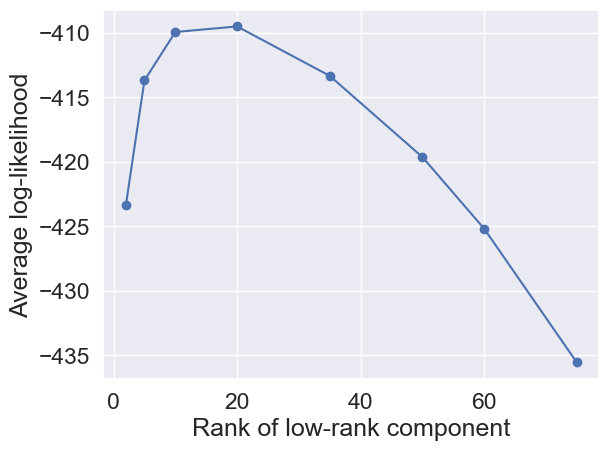

In [33]:
log_likelihood_means = [ll2[100:].mean(), ll5[100:].mean(), ll10[100:].mean(), ll20[100:].mean(), ll35[100:].mean(), ll50[100:].mean(), ll60[100:].mean(), ll75[100:].mean()]

ranks = [2, 5, 10, 20, 35, 50, 60, 75]

import matplotlib.pyplot as plt
plt.plot(ranks, log_likelihood_means, marker="o")

plt.xlabel("Rank of low-rank component")
plt.ylabel("Average log-likelihood");

In [ ]:
[ll_r2, ll_r5, ll_r10, ll_r20, ll_r35, ll_r50, ll_r60, ll_r75, ll_no_reg]

In [11]:
Sigmas_temp = {}
for iewma in ewmas_temp:
    Sigmas_temp[iewma.time] = iewma.covariance

In [134]:
ewmas10 = dict(ewma_low_rank(returns, halflife=250, min_periods=3*10, rank=10))


In [12]:
ll_temp = log_likelihood_low_rank(returns, Sigmas_temp)

<Axes: >

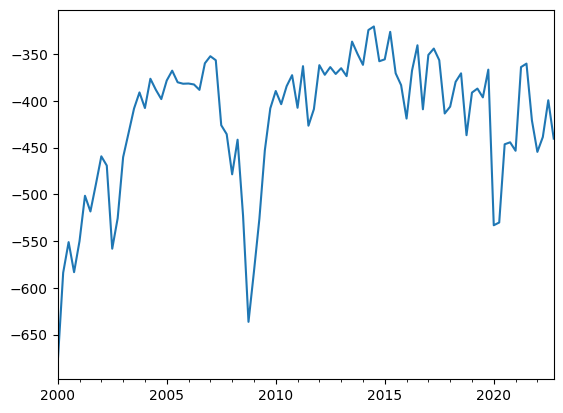

In [14]:
ll_temp.resample("Q").mean().plot()

In [116]:
[*ewmas10.values()][1000].d

8048     2.277790
20792    1.772155
10486    4.039759
21880    1.308086
2367     3.423987
           ...   
912      0.913411
1467     1.158899
31668    5.870808
5057     1.381259
21308    3.649205
Length: 238, dtype: float64

In [118]:
ll10.resample("Q").mean().plot()

-427.7919553156833

In [84]:
ewmas2 = dict(ewma_low_rank(returns, halflife=250, min_periods=3*2, rank=2))
print(1)
ewmas5 = dict(ewma_low_rank(returns, halflife=250, min_periods=3*5, rank=5))
print(2)
ewmas10 = dict(ewma_low_rank(returns, halflife=250, min_periods=3*10, rank=10))
print(3)
ewmas20 = dict(ewma_low_rank(returns, halflife=250, min_periods=3*20, rank=20))
print(4)
ewmas50 = dict(ewma_low_rank(returns, halflife=250, min_periods=3*50, rank=50))
print(5)
ewmas75 = dict(ewma_low_rank(returns, halflife=250, min_periods=3*75, rank=75))

1
2
3
4
5


In [85]:
ll2 = log_likelihood_low_rank(returns, ewmas2)
print(1)
ll5 = log_likelihood_low_rank(returns, ewmas5)
print(2)
ll10 = log_likelihood_low_rank(returns, ewmas10)
print(3)
ll20 = log_likelihood_low_rank(returns, ewmas20)
print(4)
ll50 = log_likelihood_low_rank(returns, ewmas50)
print(5)
ll75 = log_likelihood_low_rank(returns, ewmas75)

1
2
3
4
5


In [75]:
ewmas10 = dict(ewma_low_rank(returns, halflife=250, min_periods=3*10, rank=10))

In [76]:
F = [*ewmas10.values()][1000].F
d = [*ewmas10.values()][1000].d

In [78]:
cov = F@F.T + np.diag(d) * 2
lamda3, Q3 = np.linalg.eigh(cov)

In [80]:
np.linalg.det(cov)

1.5310043852731897e+188

In [49]:
np.linalg.det(Sigma)

3.5896497965538522e+87

In [48]:
np.linalg.matrix(cov)

238

In [81]:
ll10 = log_likelihood_low_rank(returns, ewmas10)

In [83]:
ll10.mean()

-430.49186496154

<Axes: >

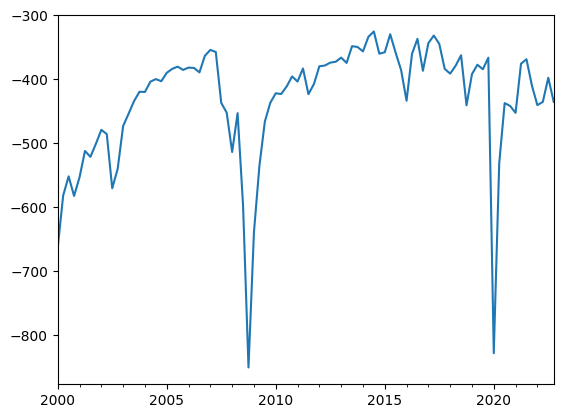

In [82]:
ll10.resample("Q").mean().plot()

In [272]:
ll_temp = log_likelihood_regularized(returns, Sigmas)

/Users/kasper/Documents/Stanford/Research/My papers/w_it_ewma/publicRepo/cov_pred_finance/experiments/utils/experiment_utils.py:59: RuntimeWarning: divide by zero encountered in log
  - 1 / 2 * np.log(det)


<Axes: >

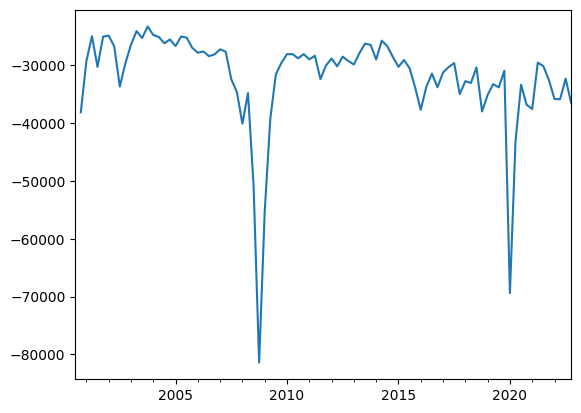

In [274]:
ll_temp.resample("Q").mean().plot()

In [271]:
Sigmas = {}

for time, low_rank in ewmas150.items():
    Sigmas[time] = low_rank.F @ low_rank.F.T + np.diag(low_rank.d)

In [280]:
ewmas10 = dict(ewma_low_rank(returns, halflife=250, min_periods=10, rank=10))

In [281]:
ll10 = log_likelihood_low_rank(returns, ewmas10)

/Users/kasper/Documents/Stanford/Research/My papers/w_it_ewma/publicRepo/cov_pred_finance/experiments/utils/experiment_utils.py:59: RuntimeWarning: divide by zero encountered in log
  - 1 / 2 * np.log(det)


<Axes: >

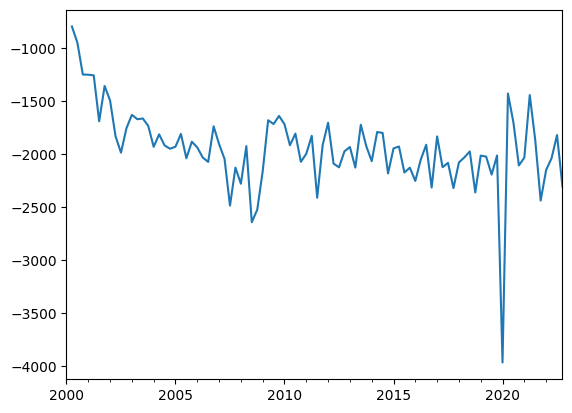

In [282]:
ll10.resample("Q").mean().plot()

In [268]:
ll150.mean()

inf

<Axes: >

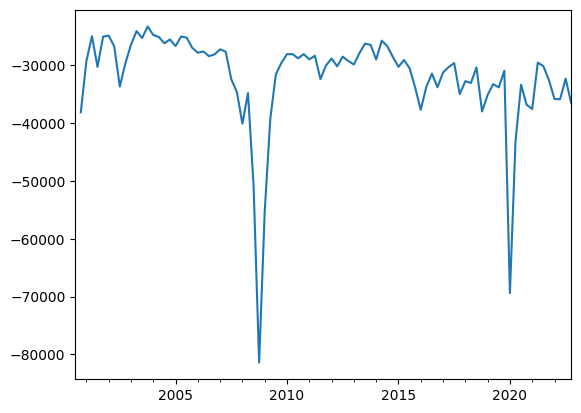

In [266]:
ll150.resample("Q").mean().plot()

<Axes: >

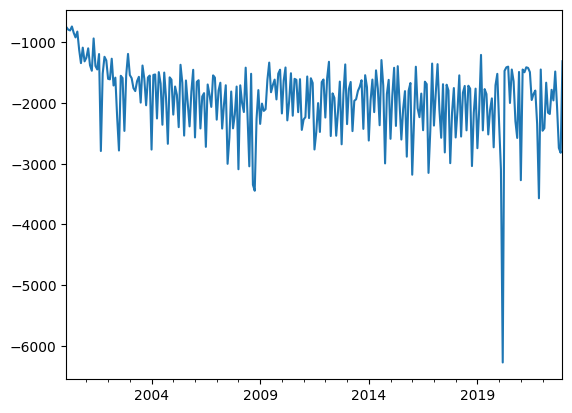

In [260]:
ll10.resample("M").mean().plot()

In [254]:
ll10 = log_likelihood_low_rank(returns, ewmas10)

<Axes: >

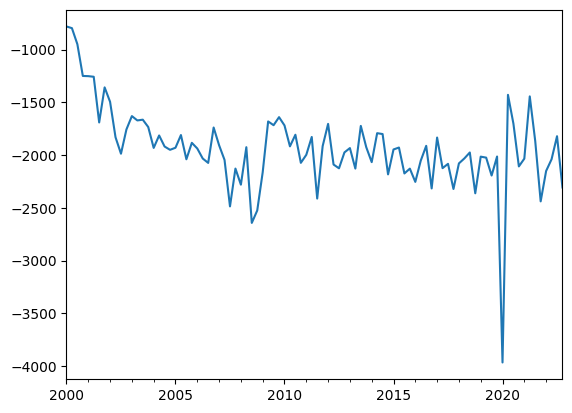

In [257]:
ll10.resample("Q").mean().plot()

In [243]:
([*ewmas20.values()][0].F @ [*ewmas20.values()][0].F.T -pd.DataFrame(np.outer(returns.loc[[*ewmas20.keys()][0]], returns.loc[[*ewmas20.keys()][0]]), index=returns.columns, columns=returns.columns)).sum().sum()

0.0

In [233]:
returns.iloc[0] @ returns.iloc[0].T

5472.64413619

<Axes: >

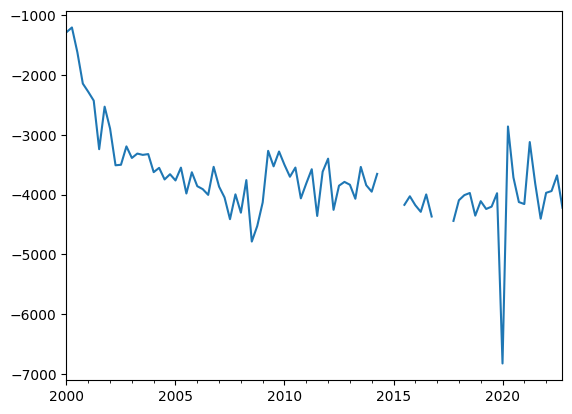

In [223]:
ll20.resample("Q").mean().plot()

In [ ]:
ll20.resample().plot()

In [215]:
ewmas200 = dict(ewma_low_rank(returns, halflife=250, min_periods=300, rank=200))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/kasper/Documents/Stanford/Research/My papers/w_it_ewma/publicRepo/cov_pred_finance/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/mr/mp0qg4bx6sj56pg6fs3s65kc0000gr/T/ipykernel_6859/279333094.py", line 1, in <module>
    ewmas200 = dict(ewma_low_rank(returns, halflife=250, min_periods=300, rank=200))
  File "/Users/kasper/Documents/Stanford/Research/My papers/w_it_ewma/publicRepo/cov_pred_finance/experiments/utils/low_rank_ewma.py", line 20, in ewma_low_rank
    for t, low_rank_covariance in _general_low_rank(
  File "/Users/kasper/Documents/Stanford/Research/My papers/w_it_ewma/publicRepo/cov_pred_finance/experiments/utils/low_rank_ewma.py", line 146, in _general_low_rank
  File "/Users/kasper/Documents/Stanford/Research/My papers/w_it_ewma/publicRepo/cov_pred_finance/experiments/utils/low_rank_ewma.py", line 66, in _l

In [209]:
ewma = dict(_ewma_cov(returns, halflife=250, min_periods=300))

In [201]:
ll2 = log_likelihood_low_rank(returns, ewmas2)
print(1)
ll5 = log_likelihood_low_rank(returns, ewmas5)
print(2)
ll10 = log_likelihood_low_rank(returns, ewmas10)
print(3)
ll20 = log_likelihood_low_rank(returns, ewmas20)
print(4)
ll50 = log_likelihood_low_rank(returns, ewmas50)
print(5)
ll75 = log_likelihood_low_rank(returns, ewmas75)

1
2
3
4
5


In [212]:
ll = log_likelihood_regularized(returns, ewma)

In [214]:
ll.mean()

-450.3051143420222

<Axes: >

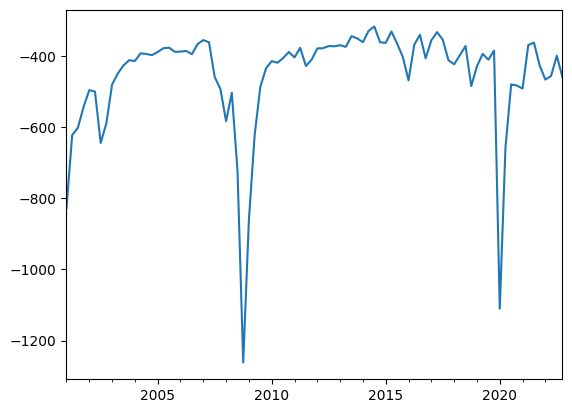

In [213]:
ll.resample("Q").mean().plot()

In [86]:
all_lls = [ll2, ll5, ll10, ll20, ll50, ll75]
avg_log_likelihoods = []

for ll in all_lls:
    avg_log_likelihoods.append(ll.mean())

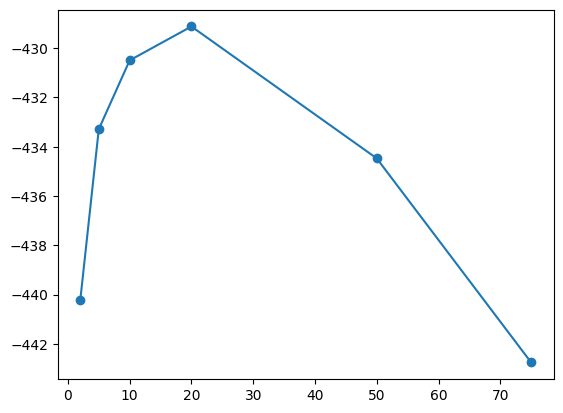

In [87]:
ranks = [2, 5, 10, 20, 50, 75]

import matplotlib.pyplot as plt

plt.plot(ranks, avg_log_likelihoods, marker='o')


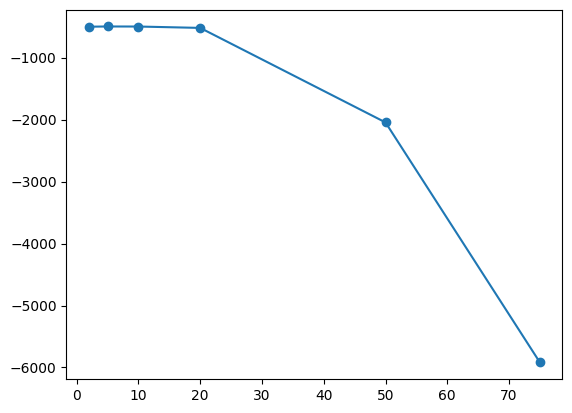

In [204]:
ranks = [2, 5, 10, 20, 50, 75]

import matplotlib.pyplot as plt

plt.plot(ranks, avg_log_likelihoods, marker='o')


In [205]:
avg_log_likelihoods

[-500.6972021904776,
 -497.200431111488,
 -498.06106146769633,
 -520.2216977658428,
 -2045.3053450661548,
 -5918.9632807058015]

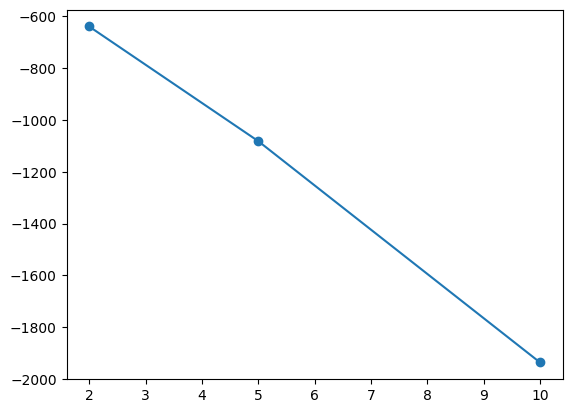

In [202]:
ranks = [2, 5, 10, 20, 50, 75]

import matplotlib.pyplot as plt

plt.plot(ranks, avg_log_likelihoods, marker='o')


In [199]:
avg_log_likelihoods

[-639.7439092267742, -1081.9701956929014, -1935.7552664089667, inf, inf, inf]

In [198]:
ranks

[2, 5, 10, 20, 50, 75]

<Axes: >

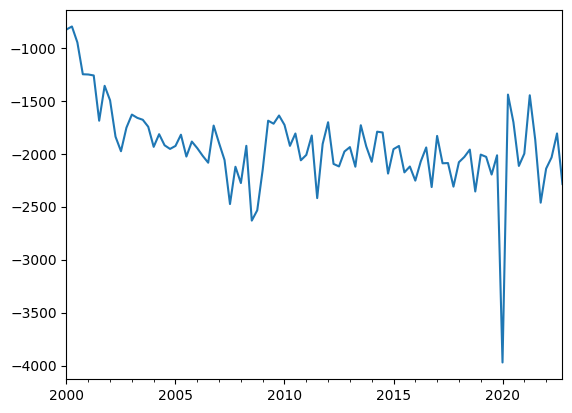

In [179]:
ll_new.resample("Q").mean().plot()

In [178]:
ll_new = log_likelihood_low_rank(returns, ewmas)

<Axes: >

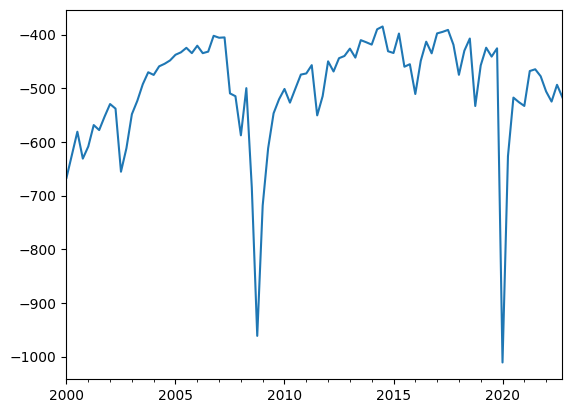

In [171]:
ll_new.resample("Q").mean().plot()

In [172]:
ll_new.mean()

-498.87939692337625

<Axes: >

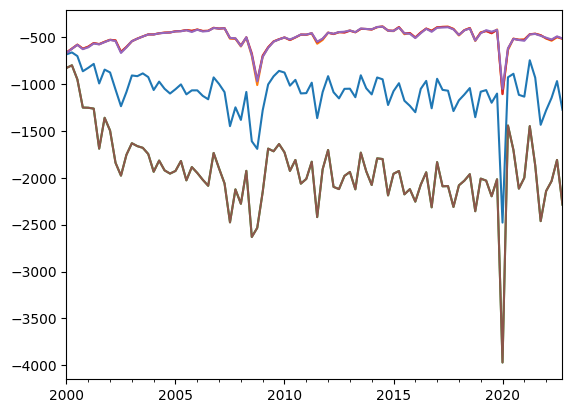

In [154]:
ll.resample("Q").mean().plot()
ll2.resample("Q").mean().plot()
ll3.resample("Q").mean().plot()
ll4.resample("Q").mean().plot()
ll5.resample("Q").mean().plot()
ll6.resample("Q").mean().plot()

<Axes: >

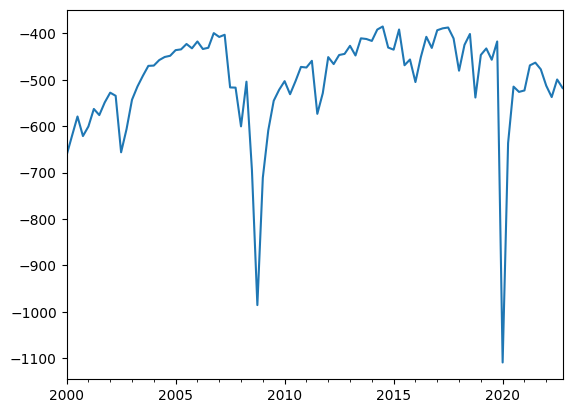

In [122]:
ll.resample("Q").mean().plot()

<Axes: >

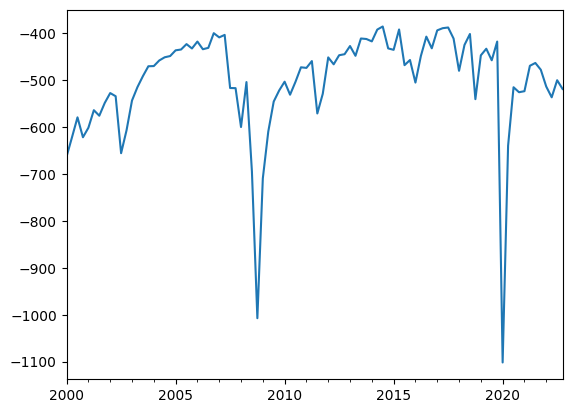

In [112]:
ll.resample("Q").mean().plot()

<Axes: >

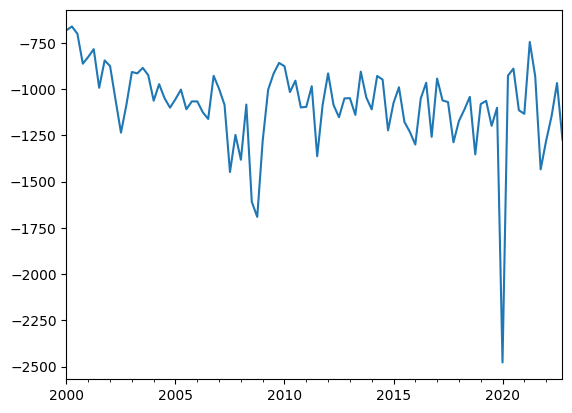

In [62]:
ll.resample("Q").mean().plot()

In [4]:
from collections import namedtuple

from scipy.sparse.linalg import LinearOperator, eigsh
import numpy as np
import pandas as pd
from pandas._typing import TimedeltaConvertibleTypes
from typing import Union

LowRankCovariance = namedtuple('LowRankCovariance', ['F', 'd'])

In [5]:
a = LowRankCovariance(1,0 )

In [127]:
A = np.random.randn(10,10)
A = A + A.T

In [128]:
lamda, Q = eigsh(A, k=5, which='LA')

In [134]:
lamda[2:]

array([4.61045177, 6.10186778])

In [132]:
Q

array([[-0.02045604,  0.13400719, -0.07259668],
       [ 0.04724324,  0.06631943,  0.14415879],
       [ 0.58282099, -0.47234165, -0.24568009],
       [-0.01725828, -0.30807587,  0.58489129],
       [-0.36730835, -0.68498734, -0.0219624 ],
       [-0.54298981,  0.04904699,  0.07670568],
       [-0.18713254,  0.0782152 ,  0.32991069],
       [ 0.10432864,  0.03704387, -0.23291502],
       [ 0.16435367, -0.3231596 ,  0.35865375],
       [-0.39332293, -0.27584628, -0.5228789 ]])